Load data from .csv files

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_path = "./data/"

airlines = pd.read_csv(base_path + "nyc_airlines.csv")
airports = pd.read_csv(base_path + "nyc_airports.csv")
flights = pd.read_csv(base_path + "nyc_flights.csv")
planes = pd.read_csv(base_path + "nyc_planes.csv")
weather = pd.read_csv(base_path + "nyc_weather.csv")

# sanity check; btw check basic info: rows, cols
for name, df in [('airlines', airlines), ('airports', airports), ('flights', flights), ('planes', planes), ('weather', weather)]:
    print(f"{name}: {df.shape[0]} rows, {df.shape[1]} columns")

airlines: 16 rows, 2 columns
airports: 1458 rows, 8 columns
flights: 336776 rows, 19 columns
planes: 3322 rows, 9 columns
weather: 26115 rows, 15 columns


Exploring the flights DataFrame

In [42]:
print('Column fields:')
print(flights.columns)

print('A few rows to see sample values:')
print(flights.head())

Column fields:
Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour'],
      dtype='object')
A few rows to see sample values:
   year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0  2013      1    1     517.0             515        2.0     830.0   
1  2013      1    1     533.0             529        4.0     850.0   
2  2013      1    1     542.0             540        2.0     923.0   
3  2013      1    1     544.0             545       -1.0    1004.0   
4  2013      1    1     554.0             600       -6.0     812.0   

   sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time  \
0             819       11.0      UA    1545  N14228    EWR  IAH     227.0   
1             830       20.0      UA    1714  N24211    LGA  IAH     227.0   
2             850       33.0   

Average and median delay

In [43]:
avg_dep_delay = flights['dep_delay'].mean(skipna=True)
median_arr_delay = flights['arr_delay'].median(skipna=True)
print(f"Average departure delay: {avg_dep_delay:.2f} min")
print(f"Median arrival delay: {median_arr_delay:.2f} min")

Average departure delay: 12.64 min
Median arrival delay: -5.00 min


Busiest airport interm of departure

In [44]:
busiest_airport_dept = flights['origin'].value_counts().idxmax()
print(f"Busiest departure airport: {busiest_airport_dept}")

Busiest departure airport: EWR


Most common destination

In [45]:
busiest_airport_arr = flights['dest'].value_counts().idxmax()
print(f"Most common destination: {busiest_airport_arr}")

Most common destination: ORD


Flights departed from JFK

In [46]:
jfk_flights = flights[flights['origin'] == 'JFK']
len(jfk_flights)


111279

Flights operated by Delta 

In [47]:
delta_flights = (flights['carrier'] == 'DL').sum()
print(delta_flights)

48110


Proportion of flights delayed > 60 

In [48]:
delay_over_60 = (flights['dep_delay'] > 60).mean()
print(f"Proportion delayed over 60 mins: {delay_over_60:.2%}")


Proportion delayed over 60 mins: 7.89%


Distribution of flights per month

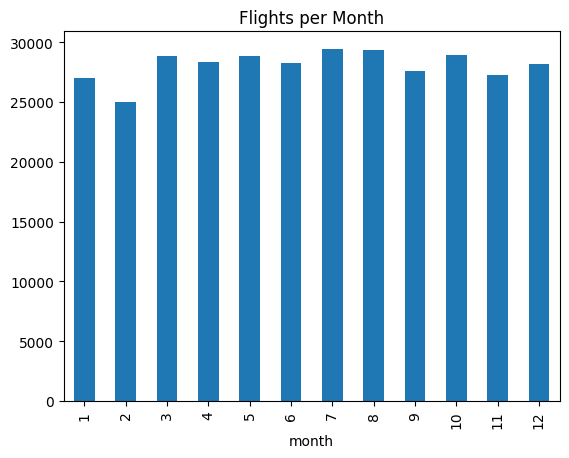

In [49]:
flights['month'].value_counts().sort_index().plot(kind='bar', title='Flights per Month')
plt.show()

Correlation between departure and delay

<Axes: >

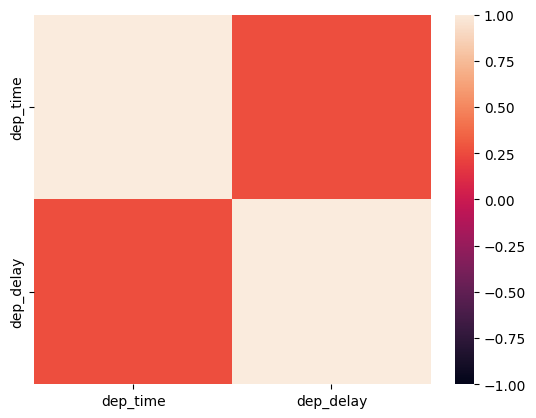

In [50]:
corr_matrix = flights[['dep_time', 'dep_delay']].corr()
sns.heatmap(corr_matrix, vmin=-1, vmax=1)

Cancellation by month

<Axes: title={'center': 'Cancellation Rate by Month'}, xlabel='month'>

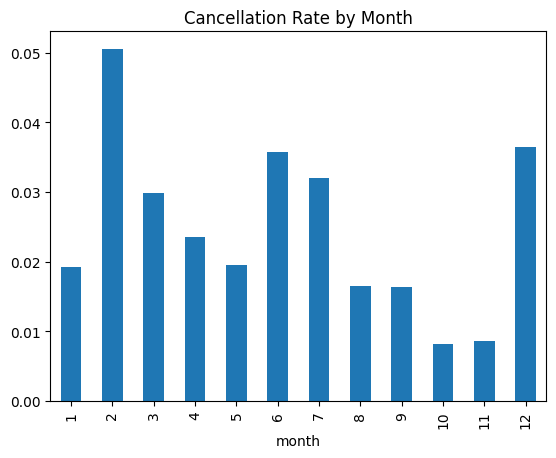

In [51]:
cancelled_flights = flights.assign(cancelled=flights['dep_time'].isna())

cancel_rate_by_month = cancelled_flights.groupby('month')['cancelled'].mean()

cancel_rate_by_month.plot(kind='bar', title='Cancellation Rate by Month')


Mean departure delay by origin airport

In [52]:
avg_dep_by_airport = flights.groupby('origin')['dep_delay'].mean()
print(avg_dep_by_airport)

origin
EWR    15.107954
JFK    12.112159
LGA    10.346876
Name: dep_delay, dtype: float64


Top 5 destination airport

In [53]:
top_dest = flights['dest'].value_counts().head(5)
top_dest


dest
ORD    17283
ATL    17215
LAX    16174
BOS    15508
MCO    14082
Name: count, dtype: int64

Airline with highest average arrival delay

In [54]:
avg_delay_by_airline = flights.groupby('carrier')['arr_delay'].mean().reset_index()

avg_delay_by_airline = avg_delay_by_airline.merge(airlines, on='carrier')

avg_delay_by_airline.sort_values('arr_delay', ascending=False).head(5)


,carrier,arr_delay,name
6,F9,21.920705,Frontier Airlines Inc.
7,FL,20.115906,AirTran Airways Corporation
5,EV,15.796431,ExpressJet Airlines Inc.
15,YV,15.556985,Mesa Airlines Inc.
10,OO,11.931034,SkyWest Airlines Inc.


Flights per airline

In [55]:
flights_per_airline = flights['carrier'].value_counts().reset_index()

flights_per_airline.columns = ['carrier', 'num_flights']

flights_per_airline.merge(airlines, on='carrier')


,carrier,num_flights,name
0,UA,58665,United Air Lines Inc.
1,B6,54635,JetBlue Airways
2,EV,54173,ExpressJet Airlines Inc.
3,DL,48110,Delta Air Lines Inc.
4,AA,32729,American Airlines Inc.
5,MQ,26397,Envoy Air
6,US,20536,US Airways Inc.
7,9E,18460,Endeavor Air Inc.
8,WN,12275,Southwest Airlines Co.
9,VX,5162,Virgin America


Cancellation rate per airline

In [56]:
cancel_rate_by_airline = flights.assign(cancelled=flights['dep_time'].isna()
                                    ).groupby('carrier')['cancelled'].mean(   
                                    ).reset_index(
                                    ).merge(airlines, on='carrier')
cancel_rate_by_airline


,carrier,cancelled,name
0,9E,0.056555,Endeavor Air Inc.
1,AA,0.019432,American Airlines Inc.
2,AS,0.002801,Alaska Airlines Inc.
3,B6,0.008529,JetBlue Airways
4,DL,0.007254,Delta Air Lines Inc.
5,EV,0.052000,ExpressJet Airlines Inc.
6,F9,0.004380,Frontier Airlines Inc.
7,FL,0.022393,AirTran Airways Corporation
8,HA,0.000000,Hawaiian Airlines Inc.
9,MQ,0.046748,Envoy Air


Most common routes

In [57]:
flights['route'] = flights['origin'] + '-' + flights['dest']

most_common_routes = flights['route'].value_counts().head(10)

most_common_routes


route
JFK-LAX    11262
LGA-ATL    10263
LGA-ORD     8857
JFK-SFO     8204
LGA-CLT     6168
EWR-ORD     6100
JFK-BOS     5898
LGA-MIA     5781
JFK-MCO     5464
EWR-BOS     5327
Name: count, dtype: int64

Merge flights with weather

In [58]:
flights_weather = pd.merge(flights, weather, on=['year', 'month', 'day', 'hour', 'origin'])
flights_weather.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour_y
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,39.92,24.98,54.81,250.0,14.96014,21.86482,0.0,1011.4,10.0,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,39.02,26.96,61.63,260.0,14.96014,NaN,0.0,1012.1,10.0,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,39.02,26.96,61.63,260.0,14.96014,NaN,0.0,1012.1,10.0,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,39.92,24.98,54.81,260.0,16.11092,23.01560,0.0,1011.7,10.0,2013-01-01T11:00:00Z


Correlation between temperature and delays

               temp  dep_delay
temp       1.000000   0.061491
dep_delay  0.061491   1.000000


<Axes: >

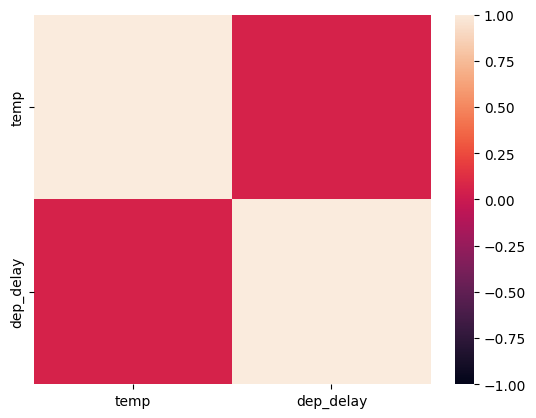

In [59]:
corr = flights_weather[['temp', 'dep_delay']].corr()
print(corr)
sns.heatmap(corr, vmin=-1, vmax=1)

Flights During Low Visibility (≤ 1 mile)

In [60]:
low_vis = flights_weather[flights_weather['visib'] <= 1]
ratio_low_vis_cancelled_1 = low_vis['dep_time'].isna().mean()
print(f"Ratio of flight cancelled due to visiblity < 1 mile: {ratio_low_vis_cancelled_1 * 100 :.2f}%")

low_vis = flights_weather[flights_weather['visib'] <= 2]
ratio_low_vis_cancelled_1 = low_vis['dep_time'].isna().mean()
print(f"Ratio of flight cancelled due to visiblity < 2 mile: {ratio_low_vis_cancelled_1 * 100 :.2f}%")




Ratio of flight cancelled due to visiblity < 1 mile: 8.92%
Ratio of flight cancelled due to visiblity < 2 mile: 9.10%
